In [ ]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree, ensemble
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import PCA
from copy import deepcopy as copy
%matplotlib inline

In [ ]:
# Connects to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get Data


In [319]:
data = pd.read_csv('/content/drive/MyDrive/employeeattrition.csv')

In [320]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [321]:
# Y features: attrition

# Preprocess

In [324]:
businesstravel_dict = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
x0_unfiltered = list(data['BusinessTravel'])
x0 = []
for travel in x0_unfiltered:
    travel_vect = [0 for i in range(3)]
    if str(travel) != 'nan': travel_vect[businesstravel_dict[travel]] = 1.
    x0.append(travel_vect)

In [325]:
department_dict = {'Human Resources':0, 'Research & Development':1, 'Sales':2}
x1_unfiltered = list(data['Department'])
x1 = []
for dept in x1_unfiltered:
    dept_vect = [0 for i in range(3)]
    if str(dept) != 'nan': dept_vect[department_dict[dept]] = 1.
    x1.append(dept_vect)

In [326]:
educationfield_dict = {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Other':4, 'Technical Degree':5}
x2_unfiltered = list(data['EducationField'])
x2 = []
for field in x2_unfiltered:
    field_vect = [0 for i in range(6)]
    if str(field) != 'nan': field_vect[educationfield_dict[field]] = 1.
    x2.append(field_vect)

In [327]:
gender_dict = {'Female':0, 'Male':1}
x3_unfiltered = list(data['Gender'])
x3 = []
for gender in x3_unfiltered:
    gender_vect = [0 for i in range(2)]
    if str(gender) != 'nan': gender_vect[gender_dict[gender]] = 1.
    x3.append(gender_vect)

In [328]:
jobrole_dict = {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4,
    'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}
x4_unfiltered = list(data['JobRole'])
x4 = []
for role in x4_unfiltered:
    role_vect = [0 for i in range(9)]
    if str(role) != 'nan': role_vect[jobrole_dict[role]] = 1.
    x4.append(role_vect)

In [329]:
maritalstatus_dict = {'Divorced':0, 'Married':1, 'Single':2}
x5_unfiltered = list(data['MaritalStatus'])
x5 = []
for status in x5_unfiltered:
    status_vect = [0 for i in range(3)]
    if str(status) != 'nan': status_vect[maritalstatus_dict[status]] = 1.
    x5.append(status_vect)

In [330]:
overtime_dict = {'No': 0, 'Yes': 1}
x6_unfiltered = list(data['OverTime'])
x6 = []
for ot in x6_unfiltered:
    ot_vect = [0 for i in range(2)]
    if str(ot) != 'nan': ot_vect[overtime_dict[ot]] = 1.
    x6.append(ot_vect)

In [331]:
x7_unfiltered = []
mean_age = 0.
num_nonnan_ages = 0.
for i in data['Age']:
    if str(i) == 'nan': x7_unfiltered.append(None)
    else:
        mean_age += int(i)
        num_nonnan_ages += 1
        x7_unfiltered.append(int(i))
mean_age /= num_nonnan_ages

x7 = []
for age in x7_unfiltered:
    if age == None: x7.append(mean_age)
    else: x7.append(age)

In [332]:
x8_unfiltered = []
mean_dailyrate = 0.
num_nonnan_dailyrates = 0.
for i in data['DailyRate']:
    if str(i) == 'nan': x8_unfiltered.append(None)
    else:
        mean_dailyrate += int(i)
        num_nonnan_dailyrates += 1
        x8_unfiltered.append(int(i))
mean_dailyrate /= num_nonnan_dailyrates

x8 = []
for rate in x8_unfiltered:
    if rate is None: x8.append(mean_dailyrate)
    else: x8.append(rate)

In [333]:
x9_unfiltered = []
mean_distance = 0.
num_nonnan_distances = 0.
for i in data['DistanceFromHome']:
    if str(i) == 'nan': x9_unfiltered.append(None)
    else:
        mean_distance += int(i)
        num_nonnan_distances += 1
        x9_unfiltered.append(int(i))
mean_distance /= num_nonnan_distances

x9 = []
for distance in x9_unfiltered:
    if distance is None: x9.append(mean_distance)
    else: x9.append(distance)

In [334]:
x10_unfiltered = []
mean_education = 0.
num_nonnan_education = 0.
for i in data['Education']:
    if str(i) == 'nan': x10_unfiltered.append(None)
    else:
        mean_education += int(i)
        num_nonnan_education += 1
        x10_unfiltered.append(int(i))
mean_education /= num_nonnan_education

x10 = []
for education in x10_unfiltered:
    if education is None: x10.append(mean_education)
    else: x10.append(education)

In [335]:
x11_unfiltered = []
mean_empnumber = 0.
num_nonnan_empnumbers = 0.
for i in data['EmployeeNumber']:
    if str(i) == 'nan': x11_unfiltered.append(None)
    else:
        mean_empnumber += int(i)
        num_nonnan_empnumbers += 1
        x11_unfiltered.append(int(i))
mean_empnumber /= num_nonnan_empnumbers

x11 = []
for empnumber in x11_unfiltered:
    if empnumber is None: x11.append(mean_empnumber)
    else: x11.append(empnumber)

In [336]:
x12_unfiltered = []
mean_envsatisfaction = 0.
num_nonnan_envsatisfactions = 0.
for i in data['EnvironmentSatisfaction']:
    if str(i) == 'nan': x12_unfiltered.append(None)
    else:
        mean_envsatisfaction += int(i)
        num_nonnan_envsatisfactions += 1
        x12_unfiltered.append(int(i))
mean_envsatisfaction /= num_nonnan_envsatisfactions

x12 = []
for envsatisfaction in x12_unfiltered:
    if envsatisfaction is None: x12.append(mean_envsatisfaction)
    else: x12.append(envsatisfaction)

In [337]:
x13_unfiltered = []
mean_hourlyrate = 0.
num_nonnan_hourlyrates = 0.
for i in data['HourlyRate']:
    if str(i) == 'nan': x13_unfiltered.append(None)
    else:
        mean_hourlyrate += int(i)
        num_nonnan_hourlyrates += 1
        x13_unfiltered.append(int(i))
mean_hourlyrate /= num_nonnan_hourlyrates

x13 = []
for hourlyrate in x13_unfiltered:
    if hourlyrate is None: x13.append(mean_hourlyrate)
    else: x13.append(hourlyrate)

In [338]:
x14_unfiltered = []
mean_jobinvolvement = 0.
num_nonnan_jobinvolvements = 0.
for i in data['JobInvolvement']:
    if str(i) == 'nan': x14_unfiltered.append(None)
    else:
        mean_jobinvolvement += int(i)
        num_nonnan_jobinvolvements += 1
        x14_unfiltered.append(int(i))
mean_jobinvolvement /= num_nonnan_jobinvolvements

x14 = []
for jobinvolvement in x14_unfiltered:
    if jobinvolvement is None: x14.append(mean_jobinvolvement)
    else: x14.append(jobinvolvement)

In [339]:
x15_unfiltered = []
mean_joblevel = 0.
num_nonnan_joblevels = 0.
for i in data['JobLevel']:
    if str(i) == 'nan': x15_unfiltered.append(None)
    else:
        mean_joblevel += int(i)
        num_nonnan_joblevels += 1
        x15_unfiltered.append(int(i))
mean_joblevel /= num_nonnan_joblevels

x15 = []
for joblevel in x15_unfiltered:
    if joblevel is None: x15.append(mean_joblevel)
    else: x15.append(joblevel)

In [340]:
x16_unfiltered = []
mean_jobsatisfaction = 0.
num_nonnan_jobsatisfactions = 0.
for i in data['JobSatisfaction']:
    if str(i) == 'nan': x16_unfiltered.append(None)
    else:
        mean_jobsatisfaction += int(i)
        num_nonnan_jobsatisfactions += 1
        x16_unfiltered.append(int(i))
mean_jobsatisfaction /= num_nonnan_jobsatisfactions

x16 = []
for jobsatisfaction in x16_unfiltered:
    if jobsatisfaction is None: x16.append(mean_jobsatisfaction)
    else: x16.append(jobsatisfaction)

In [341]:
x17_unfiltered = []
mean_monthlyincome = 0.
num_nonnan_monthlyincomes = 0.
for i in data['MonthlyIncome']:
    if str(i) == 'nan': x17_unfiltered.append(None)
    else:
        mean_monthlyincome += int(i)
        num_nonnan_monthlyincomes += 1
        x17_unfiltered.append(int(i))
mean_monthlyincome /= num_nonnan_monthlyincomes

x17 = []
for monthlyincome in x17_unfiltered:
    if monthlyincome is None: x17.append(mean_monthlyincome)
    else: x17.append(monthlyincome)

In [342]:
x18_unfiltered = []
mean_monthlyrate = 0.
num_nonnan_monthlyrates = 0.
for i in data['MonthlyRate']:
    if str(i) == 'nan': x18_unfiltered.append(None)
    else:
        mean_monthlyrate += int(i)
        num_nonnan_monthlyrates += 1
        x18_unfiltered.append(int(i))
mean_monthlyrate /= num_nonnan_monthlyrates

x18 = []
for monthlyrate in x18_unfiltered:
    if monthlyrate is None: x18.append(mean_monthlyrate)
    else: x18.append(monthlyrate)

In [343]:
x19_unfiltered = []
mean_numcompanies = 0.
num_nonnan_numcompanies = 0.
for i in data['NumCompaniesWorked']:
    if str(i) == 'nan': x19_unfiltered.append(None)
    else:
        mean_numcompanies += int(i)
        num_nonnan_numcompanies += 1
        x19_unfiltered.append(int(i))
mean_numcompanies /= num_nonnan_numcompanies

x19 = []
for numcompanies in x19_unfiltered:
    if numcompanies is None: x19.append(mean_numcompanies)
    else: x19.append(numcompanies)

In [344]:
x20_unfiltered = []
mean_percentsalaryhike = 0.
num_nonnan_percentsalaryhikes = 0.
for i in data['PercentSalaryHike']:
    if str(i) == 'nan': x20_unfiltered.append(None)
    else:
        mean_percentsalaryhike += int(i)
        num_nonnan_percentsalaryhikes += 1
        x20_unfiltered.append(int(i))
mean_percentsalaryhike /= num_nonnan_percentsalaryhikes

x20 = []
for percentsalaryhike in x20_unfiltered:
    if percentsalaryhike is None: x20.append(mean_percentsalaryhike)
    else: x20.append(percentsalaryhike)

In [345]:
x21_unfiltered = []
mean_performancerating = 0.
num_nonnan_performanceratings = 0.
for i in data['PerformanceRating']:
    if str(i) == 'nan':
        x21_unfiltered.append(None)
    else:
        mean_performancerating += int(i)
        num_nonnan_performanceratings += 1
        x21_unfiltered.append(int(i))
mean_performancerating /= num_nonnan_performanceratings

x21 = []
for performancerating in x21_unfiltered:
    if performancerating is None: x21.append(mean_performancerating)
    else: x21.append(performancerating)

In [346]:
x22_unfiltered = []
mean_relationshipsatisfaction = 0.
num_nonnan_relationshipsatisfactions = 0.
for i in data['RelationshipSatisfaction']:
    if str(i) == 'nan':
        x22_unfiltered.append(None)
    else:
        mean_relationshipsatisfaction += int(i)
        num_nonnan_relationshipsatisfactions += 1
        x22_unfiltered.append(int(i))
mean_relationshipsatisfaction /= num_nonnan_relationshipsatisfactions

x22 = []
for relationshipsatisfaction in x22_unfiltered:
    if relationshipsatisfaction is None: x22.append(mean_relationshipsatisfaction)
    else: x22.append(relationshipsatisfaction)

In [347]:
x23_unfiltered = []
mean_stockoptionlevel = 0.
num_nonnan_stockoptionlevels = 0.
for i in data['StockOptionLevel']:
    if str(i) == 'nan': x23_unfiltered.append(None)
    else:
        mean_stockoptionlevel += int(i)
        num_nonnan_stockoptionlevels += 1
        x23_unfiltered.append(int(i))
mean_stockoptionlevel /= num_nonnan_stockoptionlevels

x23 = []
for stockoptionlevel in x23_unfiltered:
    if stockoptionlevel is None: x23.append(mean_stockoptionlevel)
    else: x23.append(stockoptionlevel)

In [348]:
x24_unfiltered = []
mean_totalworkingyears = 0.
num_nonnan_totalworkingyears = 0.
for i in data['TotalWorkingYears']:
    if str(i) == 'nan': x24_unfiltered.append(None)
    else:
        mean_totalworkingyears += int(i)
        num_nonnan_totalworkingyears += 1
        x24_unfiltered.append(int(i))
mean_totalworkingyears /= num_nonnan_totalworkingyears

x24 = []
for totalworkingyears in x24_unfiltered:
    if totalworkingyears is None: x24.append(mean_totalworkingyears)
    else: x24.append(totalworkingyears)

In [349]:
x25_unfiltered = []
mean_trainingtimes = 0.
num_nonnan_trainingtimes = 0.
for i in data['TrainingTimesLastYear']:
    if str(i) == 'nan': x25_unfiltered.append(None)
    else:
        mean_trainingtimes += int(i)
        num_nonnan_trainingtimes += 1
        x25_unfiltered.append(int(i))
mean_trainingtimes /= num_nonnan_trainingtimes

x25 = []
for trainingtimes in x25_unfiltered:
    if trainingtimes is None: x25.append(mean_trainingtimes)
    else: x25.append(trainingtimes)

In [350]:
x26_unfiltered = []
mean_worklifebalance = 0.
num_nonnan_worklifebalances = 0.
for i in data['WorkLifeBalance']:
    if str(i) == 'nan': x26_unfiltered.append(None)
    else:
        mean_worklifebalance += int(i)
        num_nonnan_worklifebalances += 1
        x26_unfiltered.append(int(i))
mean_worklifebalance /= num_nonnan_worklifebalances

x26 = []
for worklifebalance in x26_unfiltered:
    if worklifebalance is None: x26.append(mean_worklifebalance)
    else: x26.append(worklifebalance)

In [351]:
x27_unfiltered = []
mean_yearsatcompany = 0.
num_nonnan_yearsatcompany = 0.
for i in data['YearsAtCompany']:
    if str(i) == 'nan': x27_unfiltered.append(None)
    else:
        mean_yearsatcompany += int(i)
        num_nonnan_yearsatcompany += 1
        x27_unfiltered.append(int(i))
mean_yearsatcompany /= num_nonnan_yearsatcompany

x27 = []
for yearsatcompany in x27_unfiltered:
    if yearsatcompany is None: x27.append(mean_yearsatcompany)
    else: x27.append(yearsatcompany)

In [352]:
x28_unfiltered = []
mean_yearscurrentrole = 0.
num_nonnan_yearscurrentrole = 0.
for i in data['YearsInCurrentRole']:
    if str(i) == 'nan': x28_unfiltered.append(None)
    else:
        mean_yearscurrentrole += int(i)
        num_nonnan_yearscurrentrole += 1
        x28_unfiltered.append(int(i))
mean_yearscurrentrole /= num_nonnan_yearscurrentrole

x28 = []
for yearscurrentrole in x28_unfiltered:
    if yearscurrentrole is None: x28.append(mean_yearscurrentrole)
    else: x28.append(yearscurrentrole)

In [353]:
x29_unfiltered = []
mean_yearssincelastpromotion = 0.
num_nonnan_yearssincelastpromotion = 0.
for i in data['YearsSinceLastPromotion']:
    if str(i) == 'nan': x29_unfiltered.append(None)
    else:
        mean_yearssincelastpromotion += int(i)
        num_nonnan_yearssincelastpromotion += 1
        x29_unfiltered.append(int(i))
mean_yearssincelastpromotion /= num_nonnan_yearssincelastpromotion

x29 = []
for yearssincelastpromotion in x29_unfiltered:
    if yearssincelastpromotion is None: x29.append(mean_yearssincelastpromotion)
    else: x29.append(yearssincelastpromotion)

In [354]:
x30_unfiltered = []
mean_yearscurrmanager = 0.
num_nonnan_yearscurrmanager = 0.
for i in data['YearsWithCurrManager']:
    if str(i) == 'nan': x30_unfiltered.append(None)
    else:
        mean_yearscurrmanager += int(i)
        num_nonnan_yearscurrmanager += 1
        x30_unfiltered.append(int(i))
mean_yearscurrmanager /= num_nonnan_yearscurrmanager

x30 = []
for yearscurrmanager in x30_unfiltered:
    if yearscurrmanager is None: x30.append(mean_yearscurrmanager)
    else: x30.append(yearscurrmanager)

In [355]:
y = []
x = []
for i, attrition in enumerate(data['Attrition']):
    if str(attrition) == "nan": continue
    if str(attrition) == "Yes": attrition = 1.
    else: attrition = 0.
    y.append(int(attrition))
    # x.append(x0[i] + x1[i] + x2[i] + x3[i] + x4[i] + x5[i] + x6[i] + [x7[i]] + [x8[i]] + [x9[i]] + [x10[i]] + [x11[i]] + [x12[i]] + [x13[i]] + [x14[i]] + [x15[i]] + [x16[i]] + [x17[i]] + [x18[i]] + [x19[i]] + [x20[i]] + [x21[i]] + [x22[i]] + [x23[i]] + [x24[i]] + [x25[i]] + [x26[i]] + [x27[i]] + [x28[i]] + [x29[i]] + [x30[i]])
    x.append(x0[i] + x1[i] + x2[i] + x3[i] + x4[i] + x5[i] + x6[i] + [x16[i]] + [x18[i]] + [x22[i]] +
    [x23[i]] + [x25[i]] + [x26[i]] + [x27[i]] + [x28[i]] + [x30[i]])

In [356]:
x = np.array(x)
y = np.array(y)

x, y = shuffle(x, y, random_state=42)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [358]:
def normalize(data, method=3):
    data = np.array(data)
    if method == 1: normalized_data = data / data.max()
    elif method == 2: normalized_data = (data - data.mean()) / (data.max() - data.min())
    elif method == 3: normalized_data = (data - data.mean()) / data.std()
    else: raise ValueError("Unsupported normalization method. Use method 1, 2, or 3.")

    return normalized_data

In [359]:
x_train = normalize(x_train)
x_test = normalize(x_test)

# Heatmap (do not run)


Streaming output truncated to the last 5000 lines.
<ipython-input-135-cdd45b57b204>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels[key][i] = round(data_corr[key][i], 2)
<ipython-input-135-cdd45b57b204>:21: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  labels[key][i] = round(data_corr[key][i], 2)
<ipython-input-135-cdd45b57b204>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels[key][i] = round(data_corr[key][i],

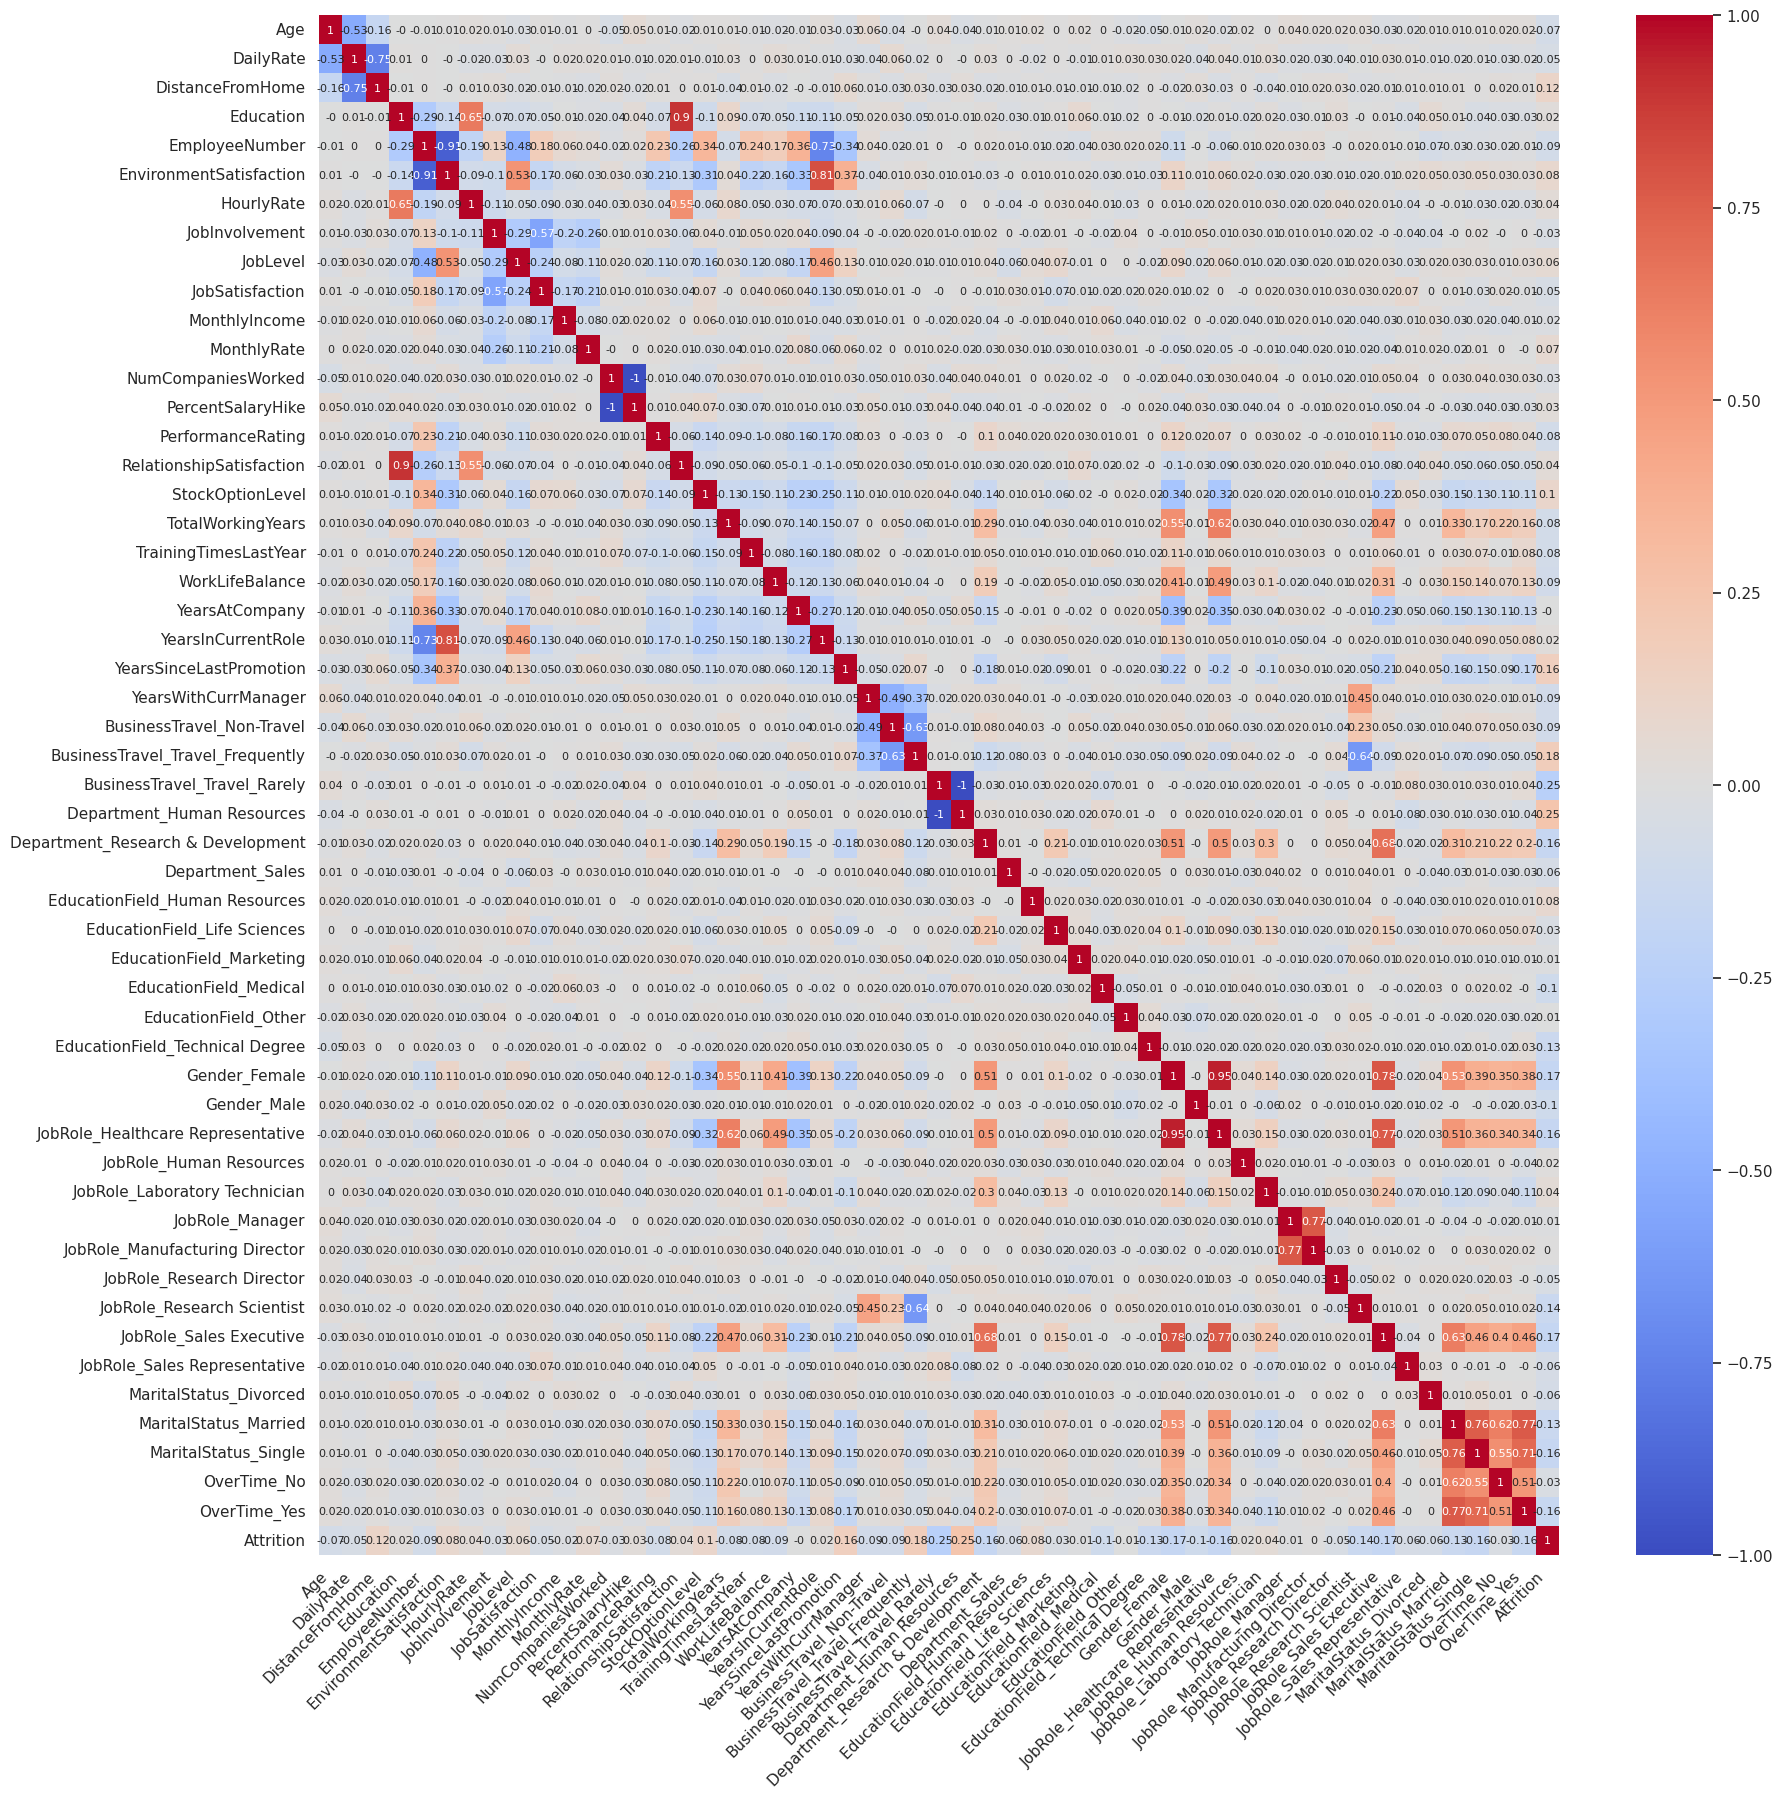

In [ ]:
"""
columns = [
    "Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeNumber", "EnvironmentSatisfaction",
    "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", "MonthlyIncome", "MonthlyRate",
    "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager",
    "BusinessTravel_Non-Travel", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely",
    "Department_Human Resources", "Department_Research & Development", "Department_Sales",
    "EducationField_Human Resources", "EducationField_Life Sciences", "EducationField_Marketing",
    "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree",
    "Gender_Female", "Gender_Male", "JobRole_Healthcare Representative", "JobRole_Human Resources",
    "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director",
    "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive",
    "JobRole_Sales Representative", "MaritalStatus_Divorced", "MaritalStatus_Married",
    "MaritalStatus_Single", "OverTime_No", "OverTime_Yes", "Attrition"
]
data_corr = pd.DataFrame(np.hstack([x, np.expand_dims(y, -1)]), columns=columns).corr()
labels = copy(data_corr)
for key in data_corr.keys():
    for i in range(len(data_corr[key])):
        labels[key][i] = round(data_corr[key][i], 2)
plt.figure(figsize=(20, 20))
sns.heatmap(data_corr, annot=labels, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot_kws={"size": 8}, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()
"""

In [ ]:
"""
attrition_corr = data_corr['Attrition'].drop('Attrition')
categories = {
    'JobRole': ['JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician',
                'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director',
                'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative'],
    'EducationField': ['EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing',
                       'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree'],
    'BusinessTravel': ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely'],
    'Department': ['Department_Human Resources', 'Department_Research & Development', 'Department_Sales'],
    'MaritalStatus': ['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single'],
    'Gender': ['Gender_Female', 'Gender_Male'],
    'OverTime': ['OverTime_No', 'OverTime_Yes'],
}

category_sums = {}
for category, features in categories.items():
    category_sums[category] = attrition_corr[features].abs().sum()
category_corr_series = pd.Series(category_sums)


numerical_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]
numerical_corr_series = attrition_corr[numerical_features].abs()
combined_corr_series = pd.concat([category_corr_series, numerical_corr_series])
least_correlated_overall = combined_corr_series.sort_values().head(19)
print(least_correlated_overall)
"""

YearsAtCompany              0.000360
Education                   0.016832
MonthlyIncome               0.017898
YearsInCurrentRole          0.019774
PercentSalaryHike           0.029453
NumCompaniesWorked          0.029453
JobInvolvement              0.032703
RelationshipSatisfaction    0.036215
HourlyRate                  0.036466
JobSatisfaction             0.046999
DailyRate                   0.049538
JobLevel                    0.055781
MonthlyRate                 0.069355
Age                         0.074457
PerformanceRating           0.078696
EnvironmentSatisfaction     0.080855
TrainingTimesLastYear       0.082994
TotalWorkingYears           0.083316
EmployeeNumber              0.085293
dtype: float64


# Train and evaluate model (PCA n components = 25)

In [408]:
def get_error(model, x_k_val, y_k_val):
    correct_predictions = 0
    total_predictions = len(x_k_val)
    for i in range(total_predictions):
        prediction = model.predict(np.array([x_k_val[i]]))[0]
        predicted_label = 1 if prediction >= 0.5 else 0
        if predicted_label == y_k_val[i]:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

def kfold(make_model, params, train_model, model_name, param_name):
  df = {"Model":[], "Average error":[]}
  for param in tqdm(params):
    df["Model"].append(f"{model_name} ({param_name}={param})")
    errors = []
    for train_idx, test_idx in kf.split(x_train):
      x_k_train, x_k_val = x_train[train_idx], x_train[test_idx]
      y_k_train, y_k_val = y_train[train_idx], y_train[test_idx]
      pca = PCA(n_components=25)
      pca.fit(x_k_train)
      x_k_train = pca.transform(x_k_train)
      x_k_val = pca.transform(x_k_val)
      model = make_model(param)
      model = train_model(model, x_k_train, y_k_train)
      errors.append(get_error(model, x_k_val, y_k_val))
    df["Average error"].append(np.mean(errors))
  df = pd.DataFrame(df)
  return df

In [409]:
def make_nn(num_hidden_layers):
  layers = [Input(shape=(25,))]
  for i in range(num_hidden_layers): layers.append(Dense(100, activation='relu'))
  layers.append(Dense(1, activation='sigmoid'))
  model = Sequential(layers)
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

def train_nn(model, x_k_train, y_k_train):
  model.fit(x_k_train, y_k_train, epochs=300, batch_size=100, verbose=0)
  return model

In [410]:
nn_df = kfold(make_nn, [i for i in range(1, 11)], train_nn, "Neural Network", "number of hidden layers")

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

 10%|█         | 1/10 [01:38<14:48, 98.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━

 20%|██        | 2/10 [03:41<15:03, 112.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

 30%|███       | 3/10 [05:30<12:57, 111.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

 40%|████      | 4/10 [07:20<11:03, 110.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

 50%|█████     | 5/10 [09:09<09:11, 110.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

 60%|██████    | 6/10 [11:00<07:20, 110.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

 70%|███████   | 7/10 [12:52<05:32, 110.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

 80%|████████  | 8/10 [14:46<03:43, 111.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

 90%|█████████ | 9/10 [16:44<01:53, 113.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

100%|██████████| 10/10 [18:45<00:00, 112.53s/it]


In [411]:
display(nn_df)

Model  Average error
0   Neural Network (number of hidden layers=1)       0.840986
1   Neural Network (number of hidden layers=2)       0.841837
2   Neural Network (number of hidden layers=3)       0.846939
3   Neural Network (number of hidden layers=4)       0.854592
4   Neural Network (number of hidden layers=5)       0.835884
5   Neural Network (number of hidden layers=6)       0.846939
6   Neural Network (number of hidden layers=7)       0.844388
7   Neural Network (number of hidden layers=8)       0.840136
8   Neural Network (number of hidden layers=9)       0.835034
9  Neural Network (number of hidden layers=10)       0.840136

In [412]:
def make_gbc(n_estimators):
  return GradientBoostingClassifier(n_estimators=n_estimators)

def train_gbc(model, x_k_train, y_k_train):
  return model.fit(x_k_train, y_k_train)

In [413]:
gbc_df = kfold(make_gbc, [i for i in range(1, 11)], train_gbc, "Gradient Boosting Classifier", "n_estimators")

100%|██████████| 10/10 [00:17<00:00,  1.75s/it]


In [414]:
display(gbc_df)

Model  Average error
0   Gradient Boosting Classifier (n_estimators=1)       0.840986
1   Gradient Boosting Classifier (n_estimators=2)       0.840986
2   Gradient Boosting Classifier (n_estimators=3)       0.840986
3   Gradient Boosting Classifier (n_estimators=4)       0.841837
4   Gradient Boosting Classifier (n_estimators=5)       0.840986
5   Gradient Boosting Classifier (n_estimators=6)       0.841837
6   Gradient Boosting Classifier (n_estimators=7)       0.840986
7   Gradient Boosting Classifier (n_estimators=8)       0.843537
8   Gradient Boosting Classifier (n_estimators=9)       0.843537
9  Gradient Boosting Classifier (n_estimators=10)       0.844388

In [415]:
def make_svc(degree):
  return svm.SVC(degree=degree)

def train_svc(model, x_k_train, y_k_train):
  return model.fit(x_k_train, y_k_train)

In [416]:
svc_df = kfold(make_svc, [i for i in range(1, 11)], train_svc, "SVC", "degree")

100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


In [417]:
display(svc_df)

Model  Average error
0   SVC (degree=1)       0.840986
1   SVC (degree=2)       0.840986
2   SVC (degree=3)       0.840986
3   SVC (degree=4)       0.840986
4   SVC (degree=5)       0.840986
5   SVC (degree=6)       0.840986
6   SVC (degree=7)       0.840986
7   SVC (degree=8)       0.840986
8   SVC (degree=9)       0.840986
9  SVC (degree=10)       0.840986

In [418]:
def make_dtc(max_depth):
  return tree.DecisionTreeClassifier(max_depth=max_depth)

def train_dtc(model, x_k_train, y_k_train):
  return model.fit(x_k_train, y_k_train)

In [419]:
dtc_df = kfold(make_dtc, [i for i in range(1, 11)], train_dtc, "Decision Tree Classifier", "max_depth")

100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


In [420]:
display(dtc_df)

Model  Average error
0   Decision Tree Classifier (max_depth=1)       0.840986
1   Decision Tree Classifier (max_depth=2)       0.829082
2   Decision Tree Classifier (max_depth=3)       0.822279
3   Decision Tree Classifier (max_depth=4)       0.820578
4   Decision Tree Classifier (max_depth=5)       0.820578
5   Decision Tree Classifier (max_depth=6)       0.802721
6   Decision Tree Classifier (max_depth=7)       0.798469
7   Decision Tree Classifier (max_depth=8)       0.797619
8   Decision Tree Classifier (max_depth=9)       0.780612
9  Decision Tree Classifier (max_depth=10)       0.786565

In [421]:
def make_rfc(n_estimators):
  return ensemble.RandomForestClassifier(n_estimators=n_estimators)

def train_rfc(model, x_k_train, y_k_train):
  return model.fit(x_k_train, y_k_train)

In [422]:
rfc_df = kfold(make_rfc, [i for i in range(1, 11)], train_rfc, "Random Forest Regressor", "n_estimators")

100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


In [423]:
display(rfc_df)

Model  Average error
0   Random Forest Regressor (n_estimators=1)       0.766156
1   Random Forest Regressor (n_estimators=2)       0.825680
2   Random Forest Regressor (n_estimators=3)       0.818878
3   Random Forest Regressor (n_estimators=4)       0.830782
4   Random Forest Regressor (n_estimators=5)       0.839286
5   Random Forest Regressor (n_estimators=6)       0.835034
6   Random Forest Regressor (n_estimators=7)       0.836735
7   Random Forest Regressor (n_estimators=8)       0.850340
8   Random Forest Regressor (n_estimators=9)       0.843537
9  Random Forest Regressor (n_estimators=10)       0.838435

# Train best model

In [424]:
nn_df = kfold(make_nn, [i for i in range(4, 5)], train_nn, "Neural Network", "number of hidden layers")

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

100%|██████████| 1/1 [01:44<00:00, 104.55s/it]


In [425]:
display(nn_df)

Model  Average error
0  Neural Network (number of hidden layers=4)       0.845238